In [1]:
!pip install ultralytics
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.8/872.8 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


In [2]:
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

In [3]:

from roboflow import Roboflow
rf = Roboflow(api_key="c00ZUEpszmoIrkYH4P56")
project = rf.workspace("new-dataset-uv4ia").project("driving-fvsg3")
version = project.version(5)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.95, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to driving-5 in yolov8:: 100%|██████████| 12580/12580 [00:01<00:00, 6727.43it/s]


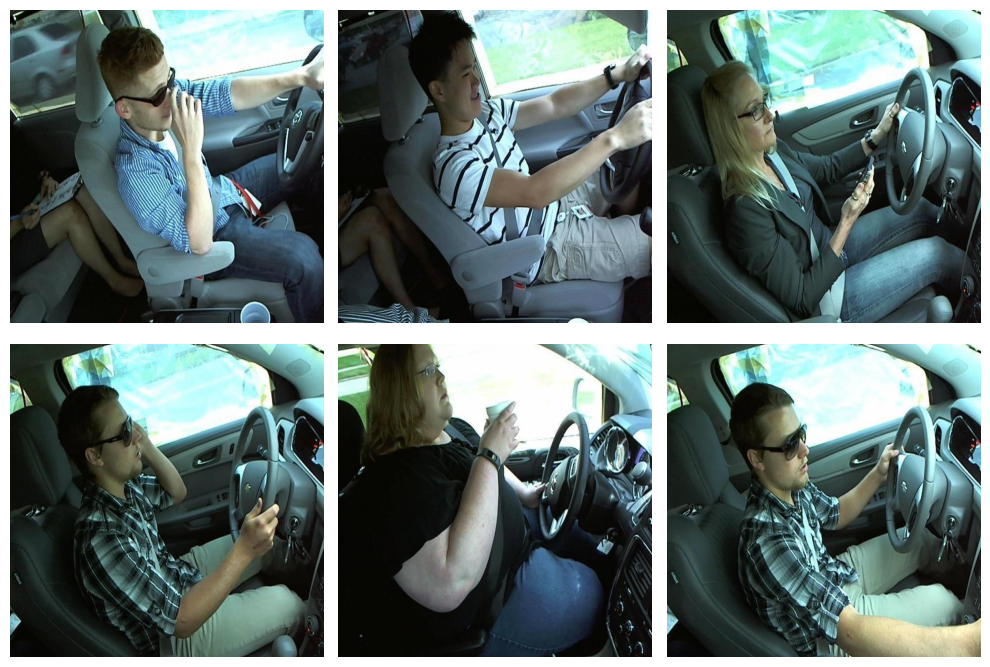

In [4]:
images_dir = '/content/driving-5/train/images/'

image_files = os.listdir(images_dir)

num_images = 6

fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        img_path = os.path.join(images_dir, image_files[i])
        img = cv2.imread(img_path)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax.imshow(img_rgb)
        ax.axis('off')

plt.tight_layout()
plt.show()

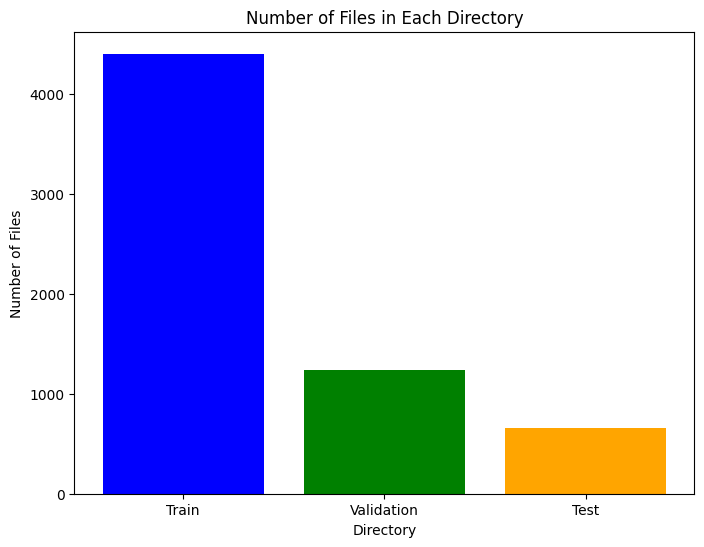

In [5]:

train_dir = '/content/driving-5/train/images'
valid_dir = '/content/driving-5/valid/images'
test_dir = '/content/driving-5/test/images'

train_count = len(os.listdir(train_dir))
valid_count = len(os.listdir(valid_dir))
test_count = len(os.listdir(test_dir))

folders = ['Train', 'Validation', 'Test']
counts = [train_count, valid_count, test_count]

plt.figure(figsize=(8, 6))
plt.bar(folders, counts, color=['blue', 'green', 'orange'])

plt.title('Number of Files in Each Directory')
plt.xlabel('Directory')
plt.ylabel('Number of Files')

plt.show()

In [7]:
model = YOLO('yolov8m.pt')
model.train(data='/content/driving-5/data.yaml', epochs=50, imgsz=640 , optimizer="RAdam", batch=32,plots=True)

Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/driving-5/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=RAdam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 128MB/s]


AMP: checks passed ✅


train: Scanning /content/driving-5/train/labels... 4399 images, 1024 backgrounds, 0 corrupt: 100%|██████████| 4399/4399 [00:01<00:00, 2290.81it/s]


train: New cache created: /content/driving-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/driving-5/valid/labels... 1232 images, 286 backgrounds, 0 corrupt: 100%|██████████| 1232/1232 [00:01<00:00, 731.11it/s]


val: New cache created: /content/driving-5/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: RAdam(lr=0.01, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.7G       1.17      2.414      1.645         35        640: 100%|██████████| 138/138 [02:32<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


                   all       1232       1076      0.222     0.0208   3.09e-05   5.69e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      13.5G       1.26      2.096      1.679         27        640: 100%|██████████| 138/138 [02:30<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


                   all       1232       1076      0.495     0.0903     0.0368     0.0129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      13.1G      1.167      1.931       1.59         29        640: 100%|██████████| 138/138 [02:30<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:21<00:00,  1.08s/it]


                   all       1232       1076      0.812      0.104     0.0345     0.0154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      13.1G      1.137      1.821      1.564         29        640: 100%|██████████| 138/138 [02:31<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:20<00:00,  1.02s/it]

                   all       1232       1076      0.394      0.261      0.141     0.0652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      13.2G      1.085      1.727      1.516         33        640: 100%|██████████| 138/138 [02:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.509      0.596      0.603      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      13.1G      1.047      1.615      1.485         29        640: 100%|██████████| 138/138 [02:28<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]

                   all       1232       1076      0.561      0.623       0.64      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      13.2G      1.028      1.577       1.47         29        640: 100%|██████████| 138/138 [02:28<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.11it/s]

                   all       1232       1076      0.685      0.657      0.717      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      13.2G     0.9974      1.496      1.447         36        640: 100%|██████████| 138/138 [02:28<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]

                   all       1232       1076      0.771      0.678      0.761      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      13.2G     0.9912        1.5      1.442         32        640: 100%|██████████| 138/138 [02:28<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.14it/s]

                   all       1232       1076      0.723      0.698      0.733      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      13.2G     0.9846       1.47      1.431         34        640: 100%|██████████| 138/138 [02:28<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.09it/s]

                   all       1232       1076      0.878      0.534      0.717      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      13.2G     0.9668      1.429      1.426         26        640: 100%|██████████| 138/138 [02:28<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.612      0.716       0.71      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      13.1G     0.9588      1.381      1.414         32        640: 100%|██████████| 138/138 [02:28<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]

                   all       1232       1076       0.63      0.681      0.749      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      13.1G     0.9658      1.411      1.413         32        640: 100%|██████████| 138/138 [02:28<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.05it/s]

                   all       1232       1076      0.603      0.705      0.735      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      13.2G     0.9358      1.383      1.389         41        640: 100%|██████████| 138/138 [02:28<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]

                   all       1232       1076      0.598      0.688      0.698      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.2G     0.9413      1.369      1.401         32        640: 100%|██████████| 138/138 [02:28<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.669       0.84      0.849       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      13.2G     0.9399      1.344      1.398         38        640: 100%|██████████| 138/138 [02:28<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.14it/s]

                   all       1232       1076      0.701      0.784      0.791      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      13.2G     0.9273      1.329      1.382         34        640: 100%|██████████| 138/138 [02:28<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]

                   all       1232       1076      0.676      0.732      0.785      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      13.1G     0.9163      1.305       1.38         31        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.784      0.773      0.814      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      13.2G     0.9184      1.294      1.385         31        640: 100%|██████████| 138/138 [02:28<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.686      0.737       0.78      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      13.2G     0.9017       1.29      1.366         31        640: 100%|██████████| 138/138 [02:28<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.734      0.818      0.831      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      13.1G     0.9011      1.272      1.372         34        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]

                   all       1232       1076      0.769      0.797      0.842      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.2G     0.9003      1.256      1.369         39        640: 100%|██████████| 138/138 [02:28<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.14it/s]

                   all       1232       1076      0.736      0.794      0.813      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      13.1G     0.9015      1.251      1.367         35        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.14it/s]

                   all       1232       1076      0.695      0.803      0.841      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      13.1G     0.8934      1.222      1.365         34        640: 100%|██████████| 138/138 [02:28<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]

                   all       1232       1076      0.802      0.846      0.855      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      13.1G     0.8829       1.21      1.352         29        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.11it/s]

                   all       1232       1076      0.719      0.863      0.867      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      13.2G     0.8732      1.196      1.351         23        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]

                   all       1232       1076      0.732      0.869      0.857      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.1G     0.8678      1.175      1.346         31        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]

                   all       1232       1076       0.74      0.895      0.871      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      13.1G     0.8757      1.157      1.344         31        640: 100%|██████████| 138/138 [02:26<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]

                   all       1232       1076      0.822      0.831       0.87      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      13.2G     0.8466      1.142      1.328         40        640: 100%|██████████| 138/138 [02:28<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.805      0.863      0.898      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      13.2G     0.8543      1.145      1.336         38        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]

                   all       1232       1076      0.755      0.895      0.902      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      13.1G     0.8536      1.113       1.33         28        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.797      0.843      0.912      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      13.2G     0.8379      1.109      1.319         30        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.821      0.897      0.932      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      13.2G     0.8354      1.078      1.319         32        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.17it/s]

                   all       1232       1076      0.792      0.874      0.919      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      13.1G     0.8308      1.091      1.317         33        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076       0.79      0.912      0.908      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      13.1G     0.8197      1.057      1.311         28        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.14it/s]

                   all       1232       1076      0.845      0.868      0.913      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      13.1G     0.8135      1.054      1.303         30        640: 100%|██████████| 138/138 [02:26<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]

                   all       1232       1076      0.836      0.897      0.921      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      13.1G     0.8127      1.039      1.302         37        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.854      0.902      0.931      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      13.1G     0.8025      1.005      1.286         29        640: 100%|██████████| 138/138 [02:26<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]

                   all       1232       1076      0.895       0.91       0.95      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      13.1G     0.7848     0.9877       1.28         28        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.14it/s]

                   all       1232       1076      0.821       0.93      0.943      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      13.1G     0.7977     0.9863      1.286         29        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.859      0.904      0.938      0.719


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      13.1G     0.7039     0.5994      1.382         15        640: 100%|██████████| 138/138 [02:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]

                   all       1232       1076      0.895        0.9      0.951      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      13.1G     0.6814     0.5564      1.373         20        640: 100%|██████████| 138/138 [02:26<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.11it/s]

                   all       1232       1076      0.848       0.93       0.95       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      13.1G     0.6703     0.5432       1.35         19        640: 100%|██████████| 138/138 [02:26<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.08it/s]

                   all       1232       1076      0.901      0.907      0.956      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      13.1G     0.6609     0.5036      1.346         11        640: 100%|██████████| 138/138 [02:25<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.897      0.931      0.957      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      13.1G     0.6534     0.4934       1.33          8        640: 100%|██████████| 138/138 [02:25<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]

                   all       1232       1076      0.917      0.918      0.959      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      13.1G     0.6468     0.4707      1.321         12        640: 100%|██████████| 138/138 [02:25<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.915      0.922      0.962      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      13.1G     0.6293     0.4439      1.308         13        640: 100%|██████████| 138/138 [02:26<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.17it/s]

                   all       1232       1076      0.921      0.932      0.967      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      13.1G     0.6189      0.427      1.302         16        640: 100%|██████████| 138/138 [02:26<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]

                   all       1232       1076      0.929      0.941      0.967      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.1G     0.6098     0.4007      1.301         11        640: 100%|██████████| 138/138 [02:25<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]

                   all       1232       1076      0.922      0.955      0.971       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      13.1G     0.5974     0.3839      1.276         14        640: 100%|██████████| 138/138 [02:26<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]

                   all       1232       1076      0.926      0.948      0.972      0.782



50 epochs completed in 2.364 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,844,971 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:22<00:00,  1.11s/it]


                   all       1232       1076      0.926      0.948      0.972      0.782
     c0 - Safe Driving        129        129      0.809      0.983      0.979      0.843
          c1 - Texting        139        139      0.989      0.978      0.988      0.863
c2 - Talking on the phone        122        122      0.957      0.992      0.995      0.814
         c4 - Drinking        133        133      0.978      0.992      0.994      0.887
  c5 - Reaching Behind        168        168      0.987          1      0.992      0.869
c7 - Talking to Passenger        123        123      0.958      0.919       0.98       0.89
      d0 - Eyes Closed        188        188       0.89      0.665      0.871      0.514
          d1 - Yawning         46         46      0.891          1      0.988      0.618
      d2 - Nodding Off         28         28      0.876          1       0.96      0.742
Speed: 0.2ms preprocess, 10.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d2e0aee3310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470